# ESTELA

**ESTELA** (Evaluation of Source and Travel time of wave Energy reaching a Local Area) method from Perez et al., (2014), identifies the relevant amount of energy directed along great circle arcs towards the study site using the partitioned wave spectra from CAWCR hindcast at a global scale

- The python library used for generating the ESTELA can be found at: https://github.com/jorgeperezg/olas, <br>
 and is based on the following publication [Pérez et al., 2014](https://doi.org/10.1007/s10236-014-0740-7)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import cmocean
import numpy as np

sys.path.insert(0, os.path.join(os.path.abspath(''), '..', '..', '..', '..'))

from bluemath.toolkit.codes.waves.estela import ESTELA

In [2]:
p_waves = '/lustre/geocean/DATA/hidronas1/volume3/DATABASES/HISTORICAL/WAVES/CSIRO/CSIRO_partition'

## RUN ESTELA 

**Set Parameters**

In [3]:
#est_ob = ESTELA(p_waves, save_monthly = True, only_sea = False)
ob_est = ESTELA(p_waves, save_monthly = True, only_sea = True)

In [4]:
ob_est.set_site(site = 'Waimea', location = [201.88184, 21.67070]) #define lon within [0-360]
ob_est.set_years(years = [1980, 2023])

In [5]:
p_estela = '/lustre/geocean/DATA/hidronas1/volume3/DATABASES/HISTORICAL/WAVES/CSIRO/CSIRO_partition/ww3.glob_24m.201405.nc'

y = np.double(p_estela.split('/')[-1].split('.')[-2][:-2])
m = np.double(p_estela.split('/')[-1].split('.')[-2][-2:])

if ((y ==2013) and (m>=6)) or (y>2013):
    print('hi')

hi


In [6]:
import xarray as xr
p_estela = '/lustre/geocean/DATA/hidronas1/volume3/DATABASES/HISTORICAL/WAVES/CSIRO/CSIRO_partition/ww3.glob_24m.201306.nc'
xr.open_dataset(p_estela)

<xarray.Dataset>
Dimensions:    (longitude: 900, latitude: 391, time: 720)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 -78.0 -77.6 -77.2 -76.8 ... 77.2 77.6 78.0
  * time       (time) datetime64[ns] 2013-06-01 ... 2013-06-30T23:00:00.00001...
Data variables: (12/61)
    MAPSTA     (latitude, longitude) int16 ...
    dpt        (time, latitude, longitude) float32 ...
    uwnd       (time, latitude, longitude) float32 ...
    vwnd       (time, latitude, longitude) float32 ...
    ice        (time, latitude, longitude) float32 ...
    hs         (time, latitude, longitude) float32 ...
    ...         ...
    vtus       (time, latitude, longitude) float32 ...
    uuss       (time, latitude, longitude) float32 ...
    vuss       (time, latitude, longitude) float32 ...
    mssx       (time, latitude, longitude) float32 ...
    mssy       (time, latitude, longitude) float32 ...
    dtd        (time, latitude, longitude) float32 ...
Attributes: (12/17)
    WAVEWATCH_III_version_number:           4.18b
    WAVEWATCH_III_switches:                 F90 NOGRB LRB4 DIST MPI NOPA UQ P...
    SIN4 namelist parameter BETAMAX:        1.33
    SDS4 namelist parameter WHITECAPWIDTH:  0.3
    product_name:                           ww3.glob_24m.201306.nc
    area:                                   Global 0.4 deg wave grid
    ...                                     ...
    easternmost_longitude:                  359.6000061
    minimum_altitude:                       -12000 m
    maximum_altitude:                       9000 m
    altitude_resolution:                    n/a
    start_date:                             2013-06-01T00:00:00Z
    stop_date:                              2013-06-30T23:00:00Z

In [ ]:
ob_est.get_estela(do_estela = True) # If do_estela = False  it will only load the previously executed estela

## PLOT ESTELA

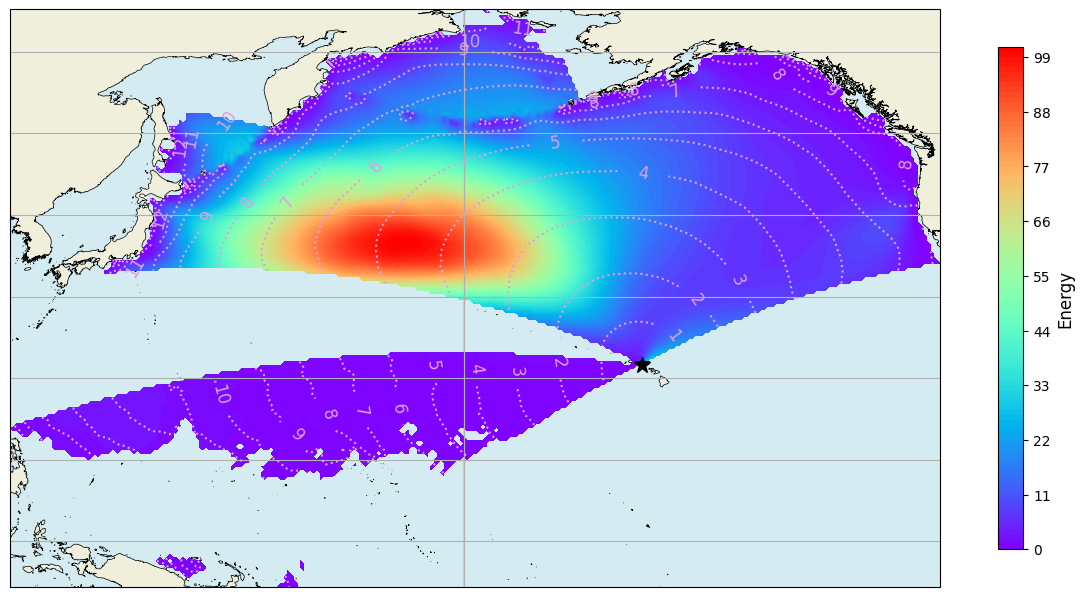

In [8]:
ob_est.plot_mean_estela() #custom_params option available

In [9]:
#est_monthly = est_ob.load_estela_monthly()
#seasonal = est_ob.load_estela_seasonal()

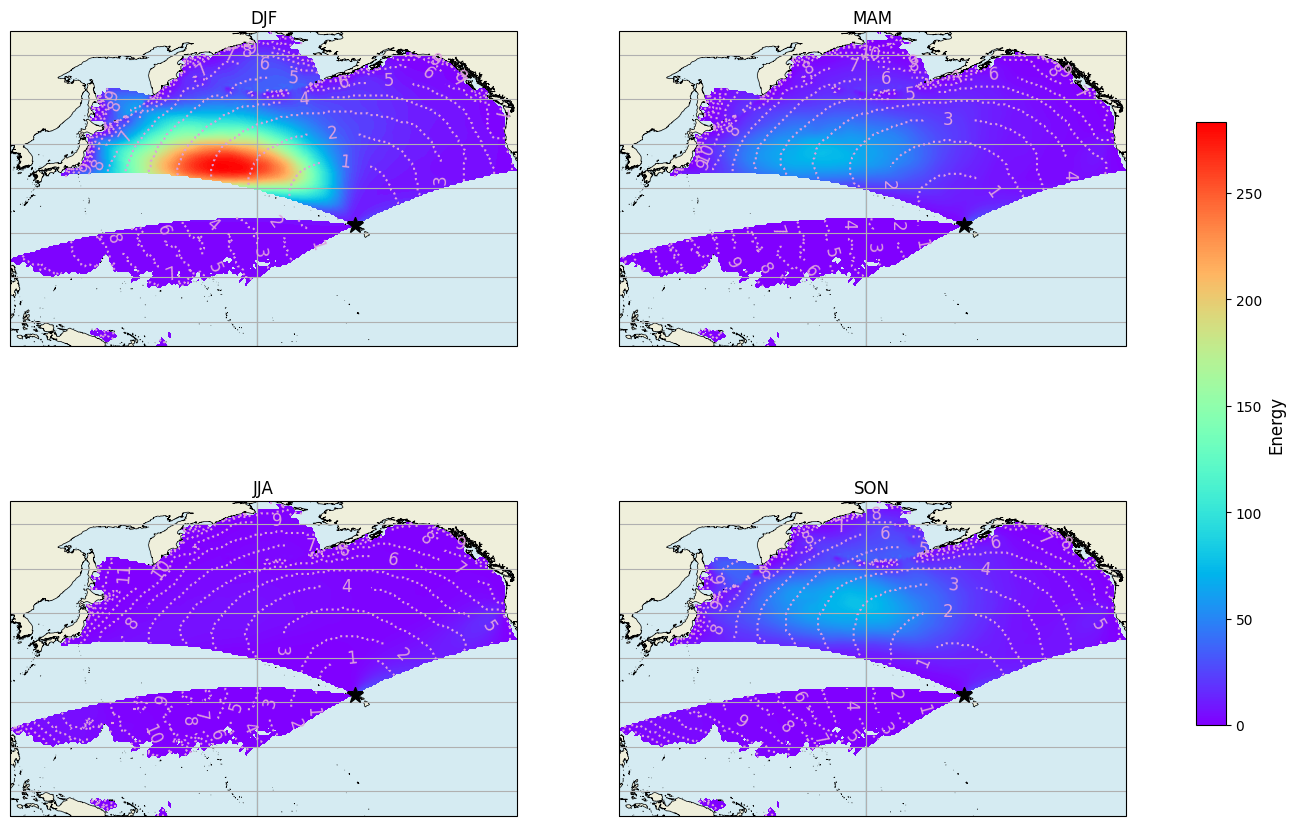

In [10]:
ob_est.plot_season_estela() #custom_params option available

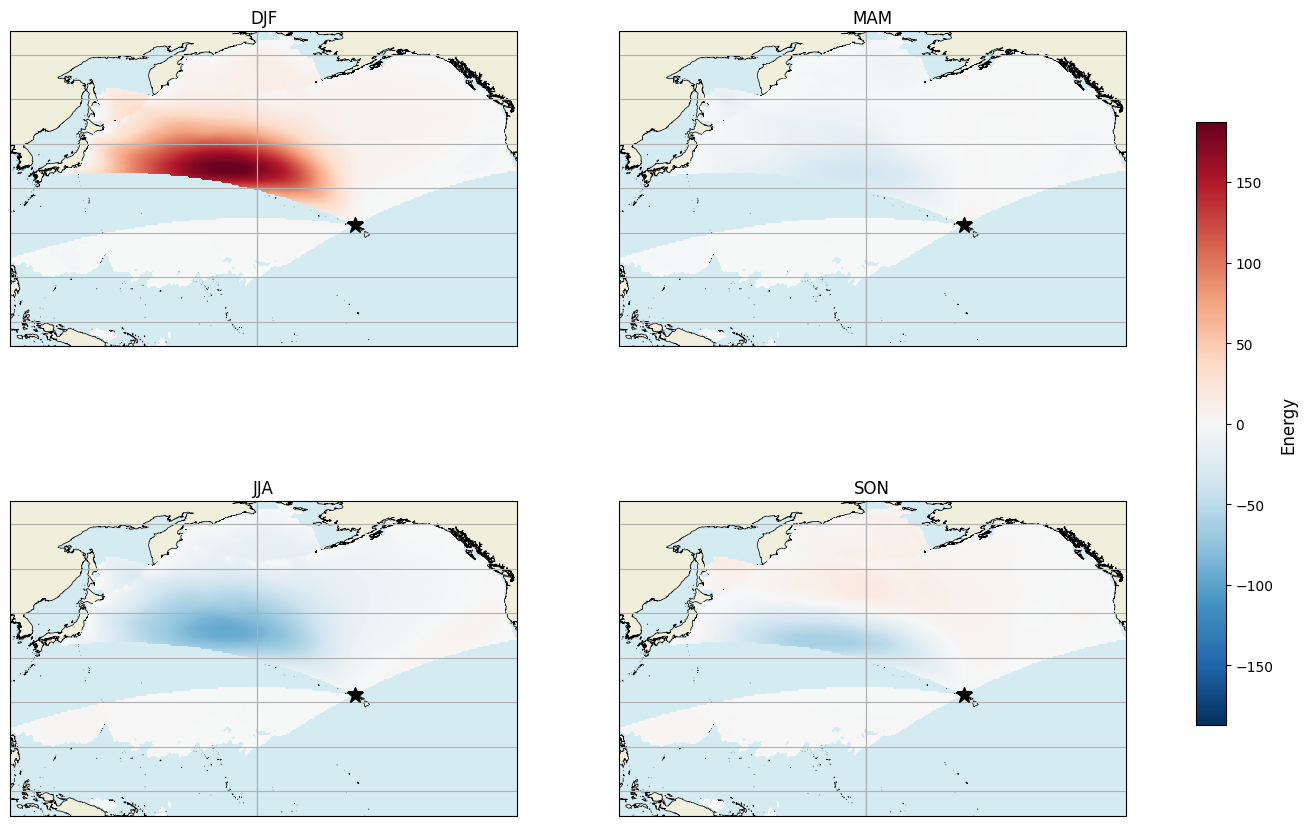

In [11]:
ob_est.plot_season_estela(anomaly = True) #custom_params option available

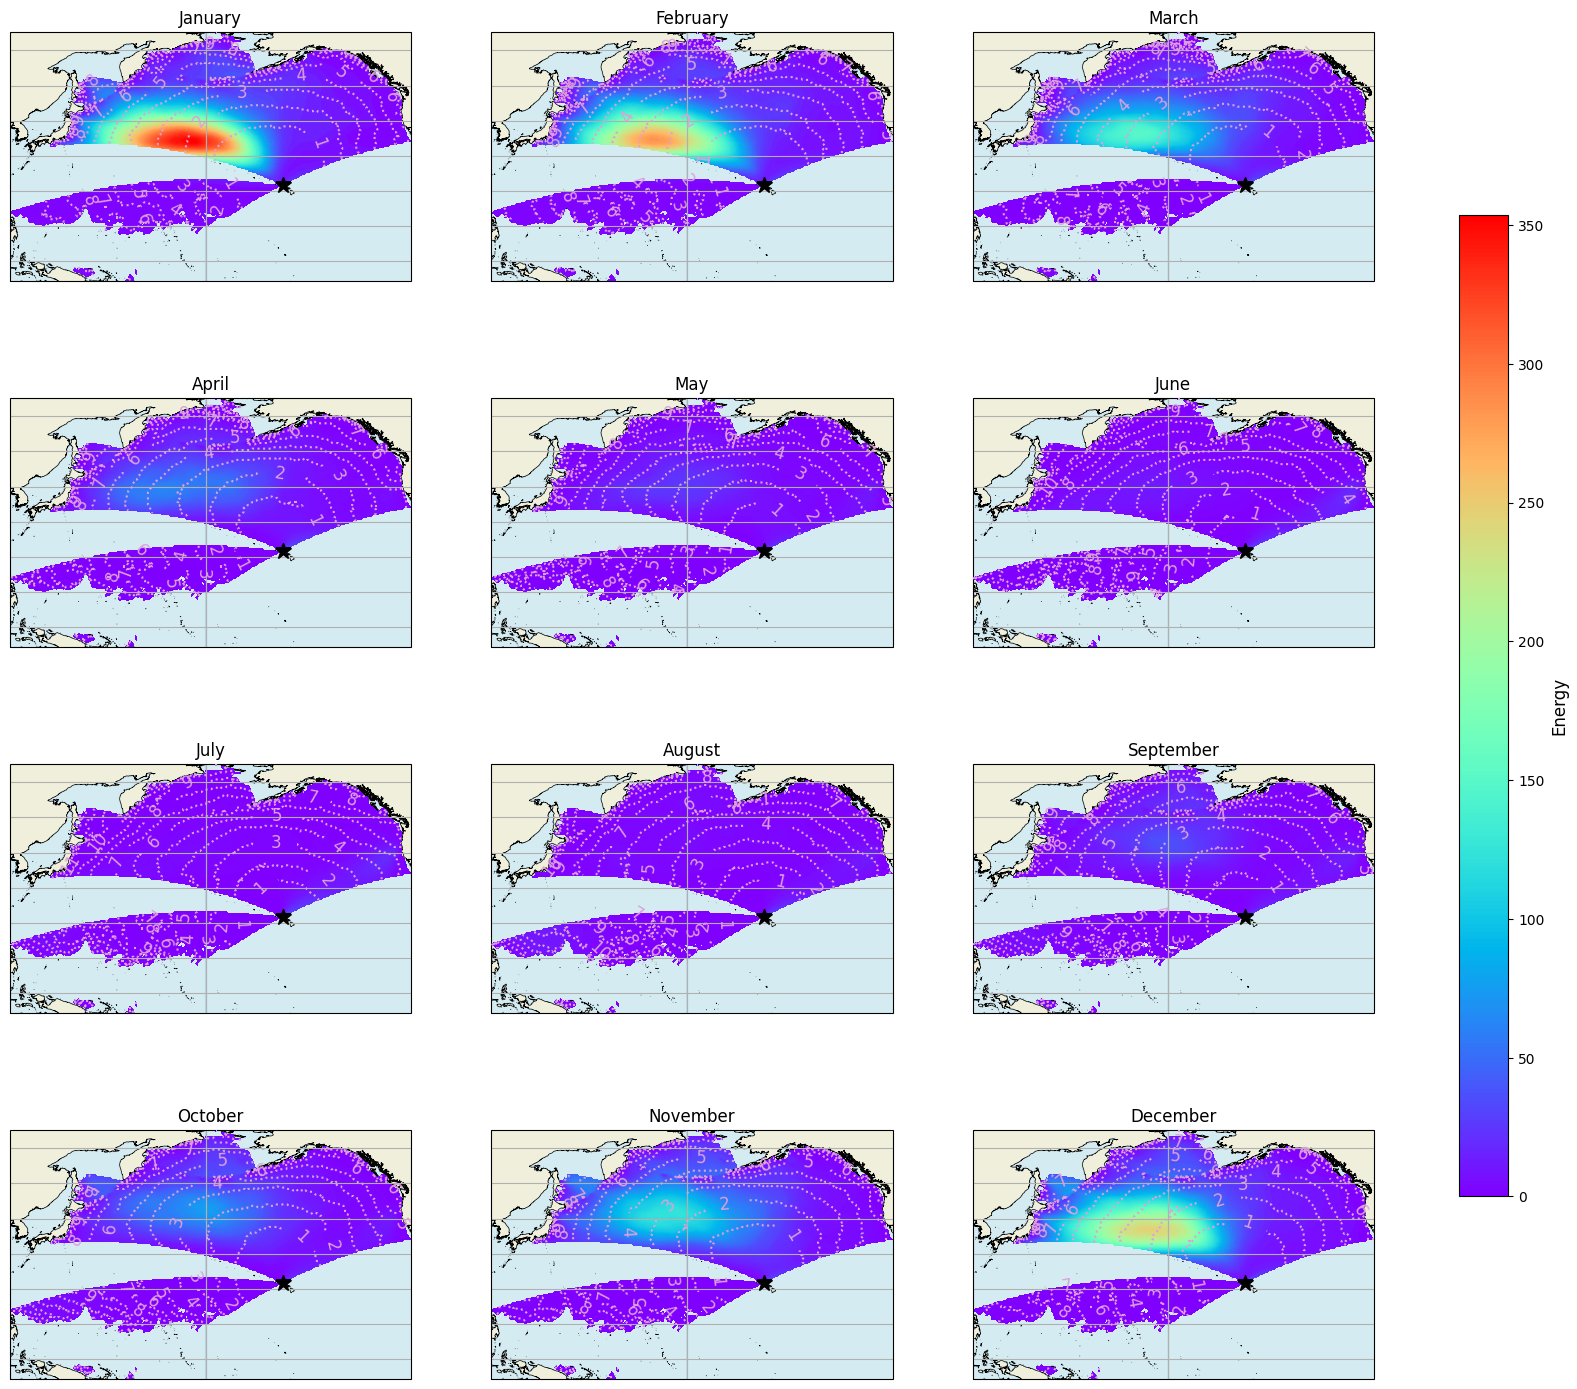

In [12]:
ob_est.plot_monthly_estela() #custom_params option available

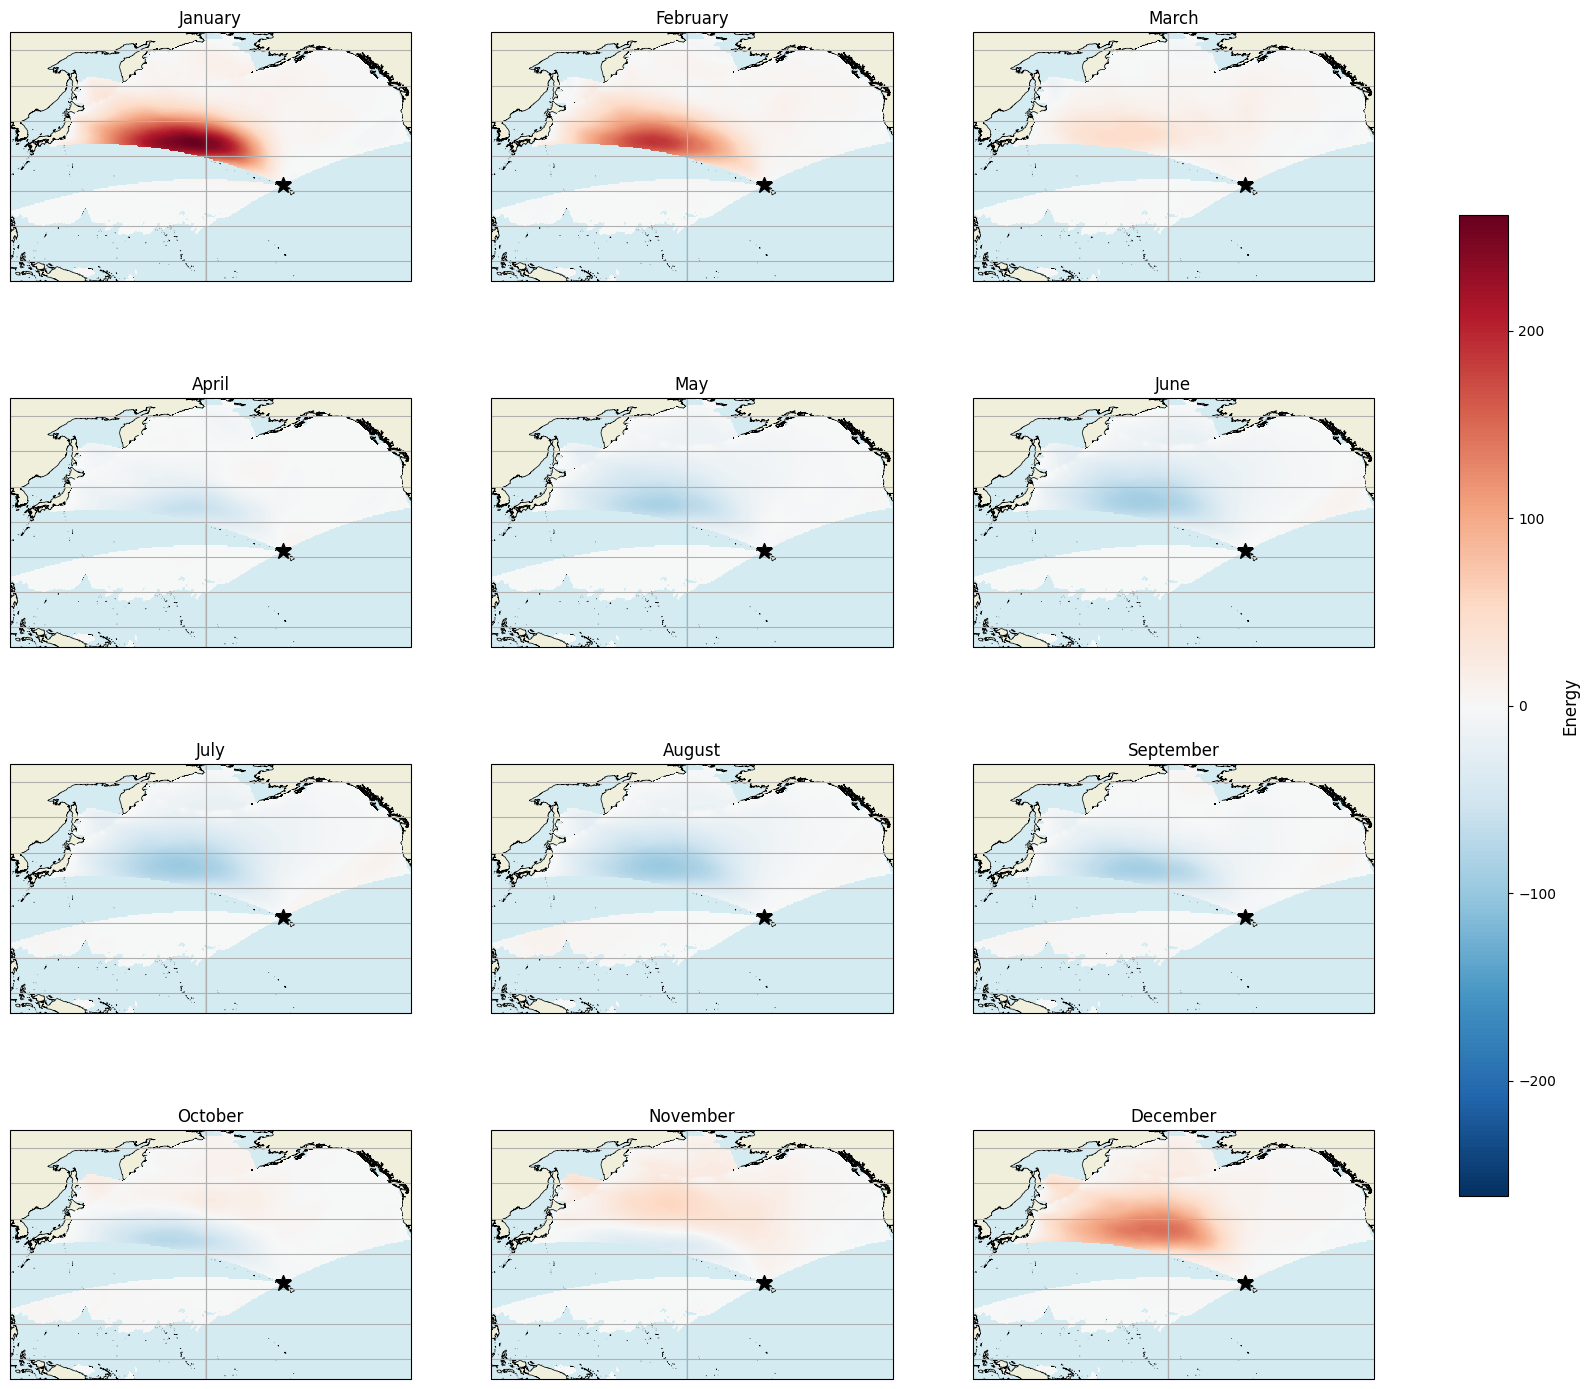

In [13]:
ob_est.plot_monthly_estela(anomaly = True) #custom_params option available